# Importo librerias

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

# Cargado de archivos

In [20]:
c = 3e8 #m/s
X, Y, V, nu = [], [], [], [] # --> Cada elemento de la lista corresponde a los datos de una longitud de onda

folder = 'Mediciones/Barrido voltaje'
fname = os.listdir(folder + '/')
for file in fname[:-1]:
    root = folder + '/' + file
    if file[:7] == 'barrido':
        medXYV = np.genfromtxt(root, delimiter = ',')
        N = len(medXYV)
        Xi, Yi, Vi = np.zeros(N - 1), np.zeros(N - 1), np.zeros(N - 1)
        for i, row in enumerate(medXYV[1:]):
            Xi[i], Yi[i], Vi[i] = row[0], row[1], row[2]
        X.append(Xi), Y.append(Yi), V.append(Vi)
        lamb = float(file[16:-6])*1e-9 #m
        nu.append(2 * np.pi * c / lamb)

R = [np.sqrt(x**2 + y**2) for x, y in zip(X, Y)]

# Cálculo de $I$ y $V_0$

In [27]:
Xp, Yp = [], []

vmin, vmax = -.7, -.08 
for k in range(len(X)):
    ind_xp = np.where((V[k] >= vmin) & (V[k] <= vmax))[0]
    
    xp = np.linspace(V[k][ind_xp[0]], V[k][ind_xp[-1]], 10_000)
    yp = np.interp(xp, V[k][ind_xp], X[k][ind_xp])
    Xp.append(xp), Yp.append(yp)

# Gráficos de las mediciones

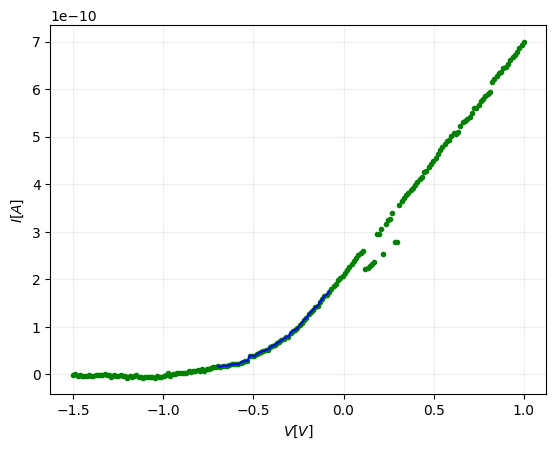

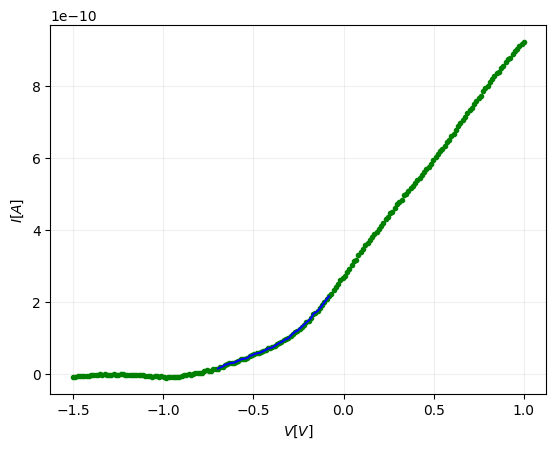

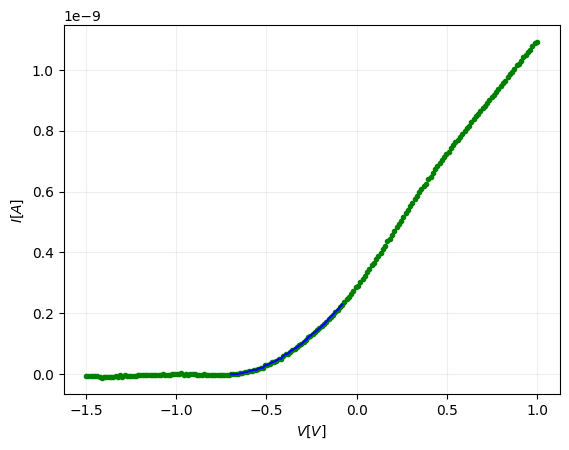

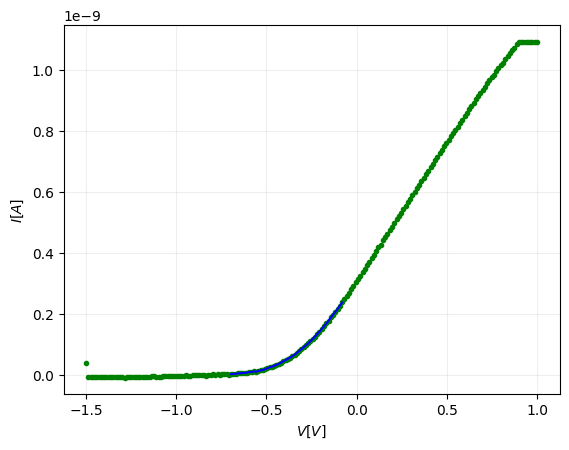

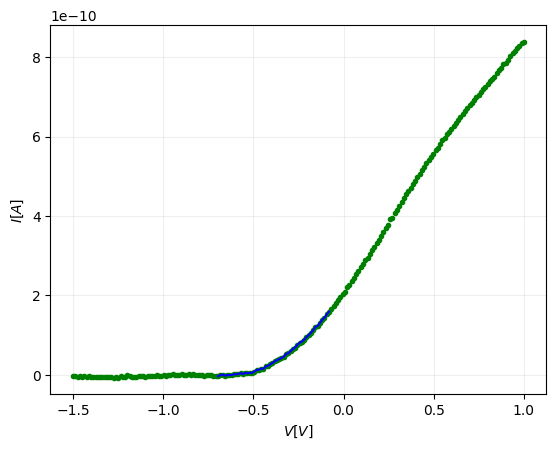

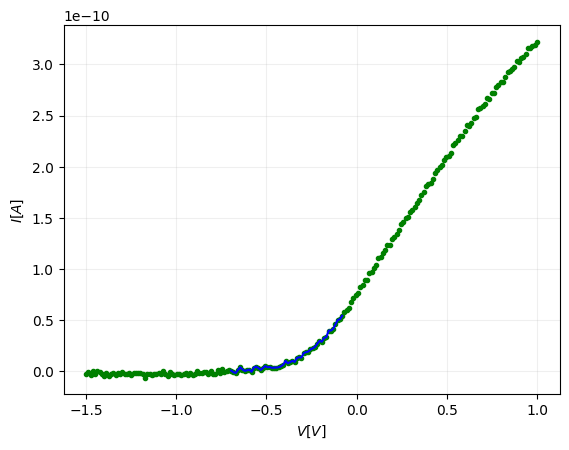

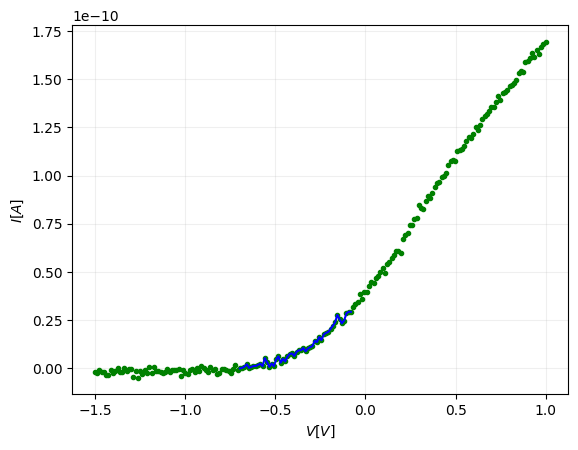

In [31]:
for k in range(len(X)):
    plt.figure()
    
    plt.plot(V[k], -X[k], '.', color = 'green')
    plt.plot(Xp[k], -Yp[k], '-', color = 'blue')

    plt.xlabel(r'$V \left[V\right]$'), plt.ylabel(r'$I \left[A\right]$')
    
    plt.grid(alpha = 0.2)
    plt.show()

# Derivadas de la interpolación

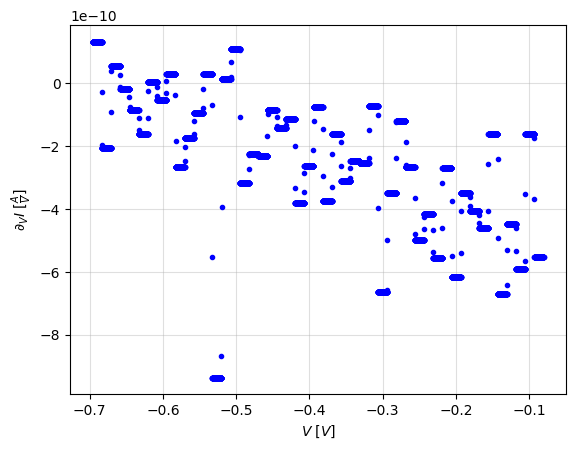

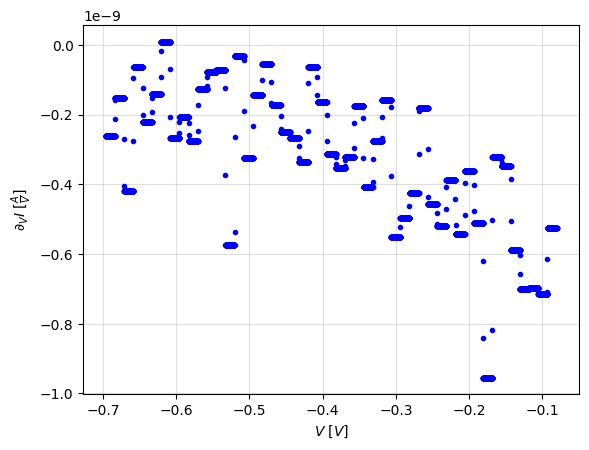

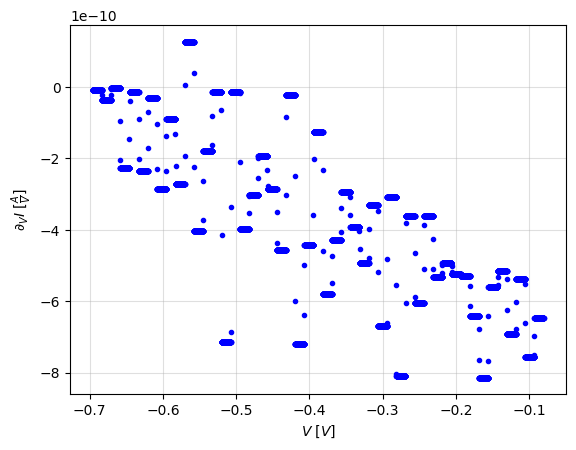

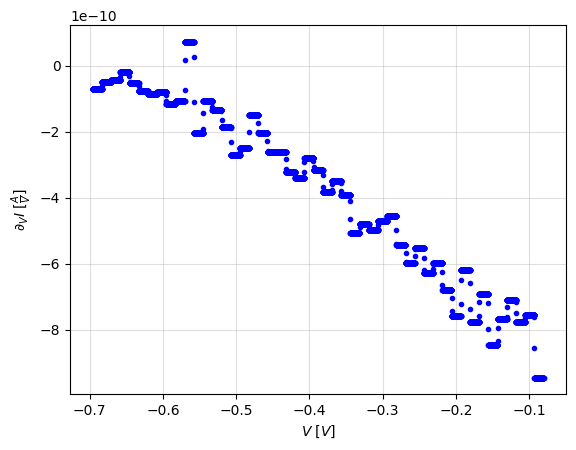

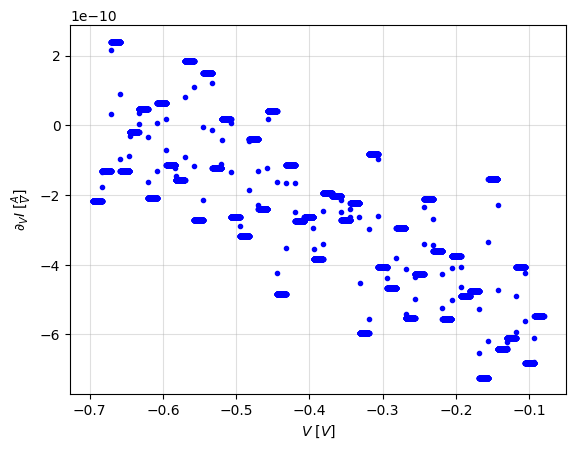

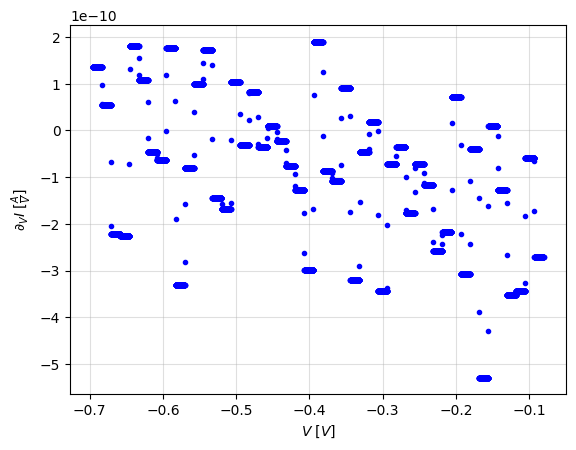

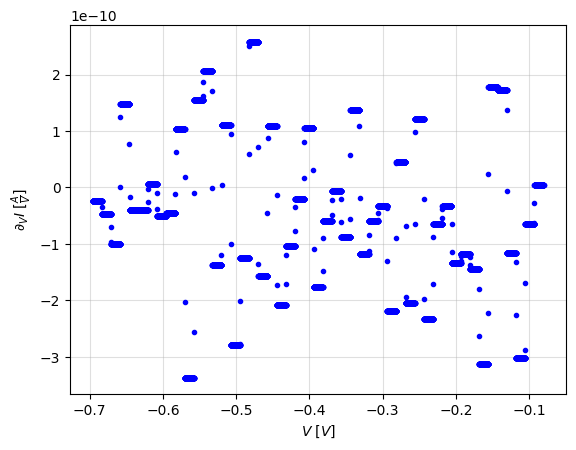

In [32]:
for k in range(len(X)):
    Dyp = np.gradient(Yp[k], Xp[k])
    
    plt.figure()
    
    plt.plot(Xp[k], Dyp, '.', color = 'blue')
    
    plt.ylabel(r'$\partial_{V}I$ $[\frac{A}{V}]$'), plt.xlabel(r'$V$ $[V]$')
    plt.grid(alpha = 0.4)
    plt.show()